# Case SQL

**Questão 1**

SELECT id, name 

TOP 10 

FROM products

WHERE status="Active"

ORDER BY price DESC;


**Questão 2**


SELECT continente_name, COUNT(*) FROM countries

GROUP BY continente_name,

ORDER BY continente_name DESC;

**Questão 3**

SELECT SUM(oi.quantity*p.price) 'total_sales',

FIRST(m.name) 'merchant'

FROM order_items oi

JOIN orders o ON oi.order_id=o.id

JOIN products p ON oi.product_id=p.id

JOIN merchants m ON p.merchant_id=m.id

WHERE o.created_at > ‘2021-01-01 00:00:00’

GROUP BY merchant

# Case Python

In [17]:
def solucao(height):
    i = 0
    j = len(height) - 1
    V1 = 0

    while i < j:
        V1 = max(V1,abs(i - j)*min(height[i], height[j]))
        
        if height[i] < height[j]:
            i += 1
        else:
            j -= 1

    return V1

testes = [
    [1,8,6,2,5,4,8,3,7], #49
    [1,1], #1
    [4,3,2,1,4], #16
    [1,2,1], #2
]

for i in range(len(testes)):
    v = solucao(testes[i])
    print('Caso {}'.format(i + 1))
    print('Input: {}'.format(testes[i]))
    print('Output: {}'.format(v))
    print('')

Caso 1
Input: [1, 8, 6, 2, 5, 4, 8, 3, 7]
Output: 49

Caso 2
Input: [1, 1]
Output: 1

Caso 3
Input: [4, 3, 2, 1, 4]
Output: 16

Caso 4
Input: [1, 2, 1]
Output: 2




# Case analise de dados


### Considere a base de dados tabela_import_teste.txt, que contém informações de venda da Black Friday de 2018. Imagine agora que, em 2019, você tem um orçamento de 40 mil reais para investir em marketing no departamento de móveis.


## Como você distribuiria esse investimento entre as categorias?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [3]:
dados=pd.read_csv('bf_2018.csv',encoding='latin-1')
dados.head()

,product_department,product_category,product_name,product_sku,data_venda,data_venda_ano_semana,data_venda_ano_mes,cliente_id,cliente_idade,cliente_sexo,entrega_estado,receita_bruta,custo_de_frete,custo_do_produto,imposto_venda,receita_liquida,margem
0,Móveis,Sala de Jantar,Conjunto 2 Cadeiras de Jantar Verona Ype Preto,RU994TA22JURMOB-113652,8/17/2018 0:00,2018/34,8/1/2018,61796,39.0,female,RJ,51.37,4.06,13.66,6.1644,45.2056,27.4856
1,Utilidades Domésticas,Café e Chá,Bandeja Grande Preto 45 cm,CO418AC43DCY-38102,8/21/2018 0:00,2018/34,8/1/2018,62195,27.0,female,SP,4.04,1.46,1.28,0.6464,3.3936,0.6536
2,Decoração,Almofadas e Mantas,Almofada Micro Fibra Cru 40x40cm,CO464AC33JYG-42712,6/4/2018 0:00,2018/23,6/1/2018,54027,29.0,female,SP,1.99,1.32,0.47,0.3383,1.6517,-0.1383
3,Móveis,Sala de Estar,Rack Bx 11-49 Tabaco 1 Prateleira,BR194RA02NRLMOB-116270,10/21/2018 0:00,2018/43,10/1/2018,68660,60.0,female,RJ,22.95,9.01,6.69,2.7540,20.1960,4.4960
4,Eletro,Climatização,Climatizador de Ar Cadence Climatize CLI300 Br...,CA380AC83JRKMOB-95856,11/28/2018 0:00,2018/48,11/1/2018,73402,53.0,male,SP,23.43,4.34,10.88,4.2174,19.2126,3.9926


- Selecionando apenas os produtos da categoria móveis

In [4]:
moveis=dados[dados['product_department']=='Móveis']
moveis.drop('product_department',axis=1,inplace=True)
moveis.head()

,product_category,product_name,product_sku,data_venda,data_venda_ano_semana,data_venda_ano_mes,cliente_id,cliente_idade,cliente_sexo,entrega_estado,receita_bruta,custo_de_frete,custo_do_produto,imposto_venda,receita_liquida,margem
0,Sala de Jantar,Conjunto 2 Cadeiras de Jantar Verona Ype Preto,RU994TA22JURMOB-113652,8/17/2018 0:00,2018/34,8/1/2018,61796,39.0,female,RJ,51.37,4.06,13.66,6.1644,45.2056,27.4856
3,Sala de Estar,Rack Bx 11-49 Tabaco 1 Prateleira,BR194RA02NRLMOB-116270,10/21/2018 0:00,2018/43,10/1/2018,68660,60.0,female,RJ,22.95,9.01,6.69,2.7540,20.1960,4.4960
5,Lavanderia,Armário Multiuso 0424 2PT Branco |Carraro,CA641CL05ODYMOB-63367,3/25/2018 0:00,2018/13,3/1/2018,48782,28.0,female,SP,31.29,6.69,8.17,3.7548,27.5352,12.6752
7,Quarto,Guarda-Roupa Turim 2PT Ype e Ébano Rufato,RU994CL28YWTMOB-123973,9/17/2018 0:00,2018/38,9/1/2018,64542,31.0,male,RJ,121.61,16.77,34.45,14.5932,107.0168,55.7968
8,Cozinha,Kit de Cozinha 656 8 Portas 2 Gavetas MDP Bran...,AR191CL88KVZMOB-96653,5/11/2018 0:00,2018/20,5/1/2018,52072,60.0,female,SP,64.01,6.99,15.32,7.6812,56.3288,34.0188


- Organizando os registros pela data da venda.

In [5]:
moveis.drop('data_venda_ano_mes',axis=1,inplace=True)
moveis['data_venda']=pd.to_datetime(moveis['data_venda'])
moveis=moveis.sort_values('data_venda').set_index('data_venda').reset_index()
moveis.head()

,data_venda,product_category,product_name,product_sku,data_venda_ano_semana,cliente_id,cliente_idade,cliente_sexo,entrega_estado,receita_bruta,custo_de_frete,custo_do_produto,imposto_venda,receita_liquida,margem
0,2018-01-01,Jardim,Cadeira Alumínio Rattan Azul,MO061CH19XIY-16613,2018/01,42722,51.0,male,MG,10.72,0.50,5.16,1.2864,9.4336,3.7736
1,2018-01-01,Colchões,Base Cama Box Si Silver Star New,CO189MA73XSGMOB-87569,2018/01,42734,31.0,female,SP,42.67,22.32,13.60,5.1204,37.5496,1.6296
2,2018-01-01,Jardim,Cadeira Alumínio Rattan Azul,MO061CH19XIY-16613,2018/01,42722,51.0,male,MG,10.72,0.50,5.16,1.2864,9.4336,3.7736
3,2018-01-01,Sala de Estar,Sofá Aston 3 Lugares Preto Suede Amassado,HE316UP05JBEMOB-95435,2018/01,6651,41.0,female,SP,129.52,37.15,36.74,15.5424,113.9776,40.0876
4,2018-01-01,Jardim,Mesa Alumínio redonda 60 cm Prata,MO061TA82XVX-16950,2018/01,42741,32.0,female,RS,18.69,1.72,6.61,2.2428,16.4472,8.1172


# Analisando as vendas dos produtos ao longo do ano

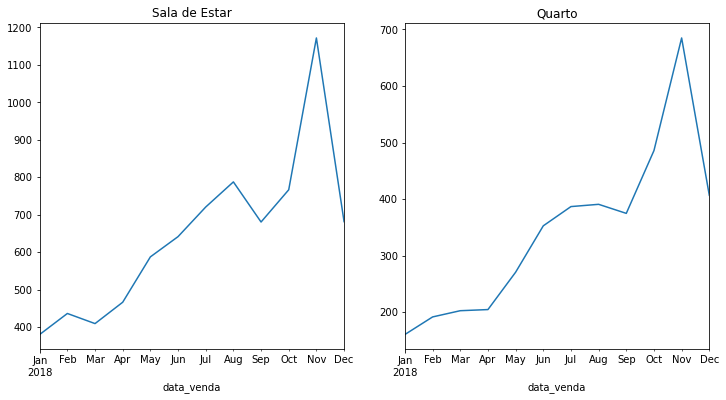

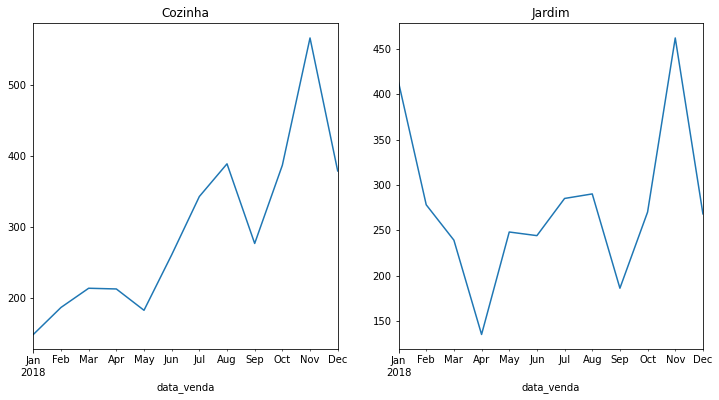

In [6]:
fig,ax=plt.subplots(1,2,figsize=(12,6))

moveis[moveis['product_category']=='Sala de Estar'].set_index('data_venda').resample('m').count()['product_category'].plot(ax=ax[0])
ax[0].set_title('Sala de Estar')
moveis[moveis['product_category']=='Quarto'].set_index('data_venda').resample('m').count()['product_category'].plot(ax=ax[1])
ax[1].set_title('Quarto')

fig,ax=plt.subplots(1,2,figsize=(12,6))

moveis[moveis['product_category']=='Cozinha'].set_index('data_venda').resample('m').count()['product_category'].plot(ax=ax[0])
ax[0].set_title('Cozinha')
moveis[moveis['product_category']=='Jardim '].set_index('data_venda').resample('m').count()['product_category'].plot(ax=ax[1])
ax[1].set_title('Jardim');



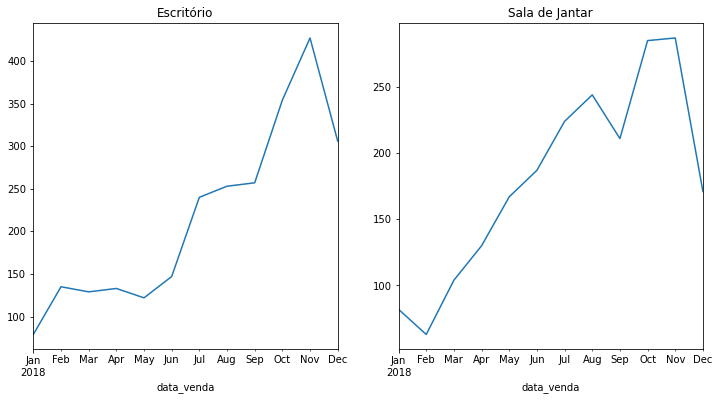

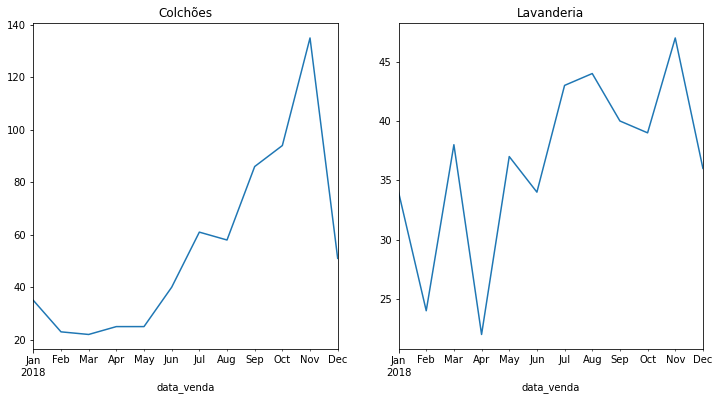

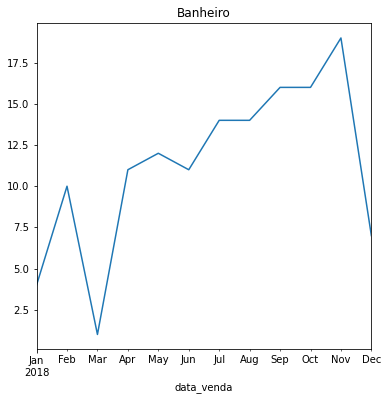

In [7]:
fig,ax=plt.subplots(1,2,figsize=(12,6))

moveis[moveis['product_category']=='Escritório'].set_index('data_venda').resample('m').count()['product_category'].plot(ax=ax[0])
ax[0].set_title('Escritório')
moveis[moveis['product_category']=='Sala de Jantar'].set_index('data_venda').resample('m').count()['product_category'].plot(ax=ax[1])
ax[1].set_title('Sala de Jantar')

fig,ax=plt.subplots(1,2,figsize=(12,6))

moveis[moveis['product_category']=='Colchões'].set_index('data_venda').resample('m').count()['product_category'].plot(ax=ax[0])
ax[0].set_title('Colchões')
moveis[moveis['product_category']=='Lavanderia'].set_index('data_venda').resample('m').count()['product_category'].plot(ax=ax[1])
ax[1].set_title('Lavanderia')

plt.figure(figsize=(6,6))
moveis[moveis['product_category']=='Banheiro'].set_index('data_venda').resample('m').count()['product_category'].plot()
plt.title('Banheiro');



## Análises:

O comportamento das vendas ao longo do ano segue um padrão, podendo observar que no mês de setembro algumas categorias vinham em uma crescente e tiveraam uma queda nas vendas, com exceção de **banheiro**, **colchões** e **quarto**, que mantiveram uma crescente.


Todas as categorias atingiram o ápice no mês de novembro, provavelmente por conta da blackfriday.

**Lavanderia** e **jardim** são as categorias que mais oscilam ao longo do ano.

# Analisando as categorias

In [8]:
moveis.product_category.value_counts()

Sala de Estar     7736
Quarto            4116
Cozinha           3548
Jardim            3318
Escritório        2582
Sala de Jantar    2155
Colchões           655
Lavanderia         438
Banheiro           135
Decoração            1
Móveis               1
Name: product_category, dtype: int64

In [9]:
moveis[(moveis['product_category']=='Móveis ') | (moveis['product_category']=='Decoração ')]

,data_venda,product_category,product_name,product_sku,data_venda_ano_semana,cliente_id,cliente_idade,cliente_sexo,entrega_estado,receita_bruta,custo_de_frete,custo_do_produto,imposto_venda,receita_liquida,margem
15,2018-01-01,Móveis,Guarda-Roupa Teen Flex II - 3 PT-6 GV - Santos...,SA085CL34HTLMOB-58970,2018/01,42727,40.0,female,SP,136.91,11.83,31.93,16.4292,120.4808,76.7208
22597,2018-12-02,Decoração,Prateleira Tramontina,TR103TA45AJQMOB-71764,2018/49,42584,41.0,female,GO,36.17,13.59,7.01,4.3404,31.8296,11.2296


In [10]:
moveis.iloc[15,1]='Quarto'
moveis.iloc[22597,1]='Escritório'

2 registros estavam em categorias erradas, então foi corrigido esse lançamento

In [11]:
moveis.product_category.value_counts()

Sala de Estar     7736
Quarto            4117
Cozinha           3548
Jardim            3318
Escritório        2583
Sala de Jantar    2155
Colchões           655
Lavanderia         438
Banheiro           135
Name: product_category, dtype: int64

Agrupando os dados por categoria do produto

In [12]:
moveis_por_categoria=moveis.groupby('product_category').sum()[['receita_bruta','custo_de_frete','custo_do_produto','imposto_venda','receita_liquida','margem']]

moveis_por_categoria

,receita_bruta,custo_de_frete,custo_do_produto,imposto_venda,receita_liquida,margem
product_category,,,,,,
Banheiro,6594.62,1211.72,1773.59,791.3544,5803.2656,2817.9556
Colchões,46288.41,11477.49,12649.58,5554.6092,40733.8008,16606.7308
Cozinha,107847.21,24151.33,27917.99,12941.6652,94905.5448,42836.2248
Escritório,97183.92,21378.74,25575.32,11662.0704,85521.8496,38567.7896
Jardim,68870.86,16419.63,18888.84,8264.5032,60606.3568,25297.8868
Lavanderia,15774.12,3437.05,4136.77,1892.8944,13881.2256,6307.4056
Quarto,309710.74,50825.44,84251.68,37165.2888,272545.4512,137468.3312
Sala de Estar,612505.84,148087.54,164017.48,73500.7008,539005.1392,226900.1192
Sala de Jantar,143769.95,24867.99,38096.52,17252.3940,126517.5560,63553.0460


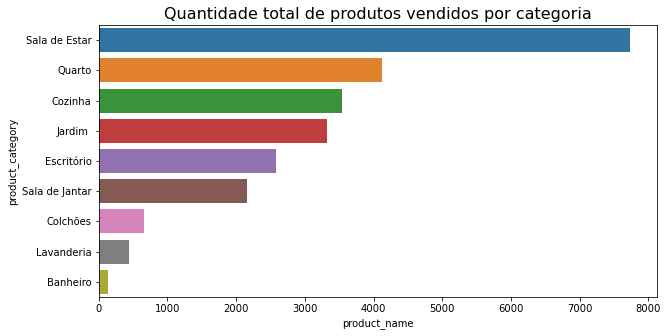

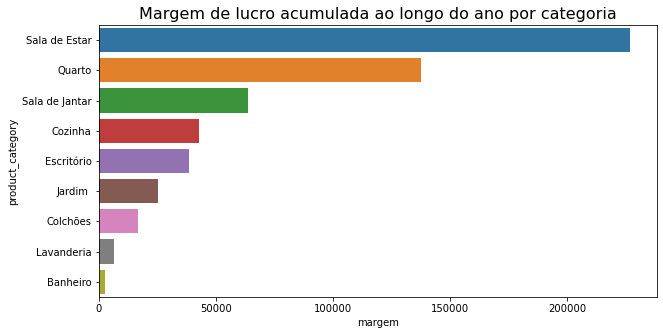

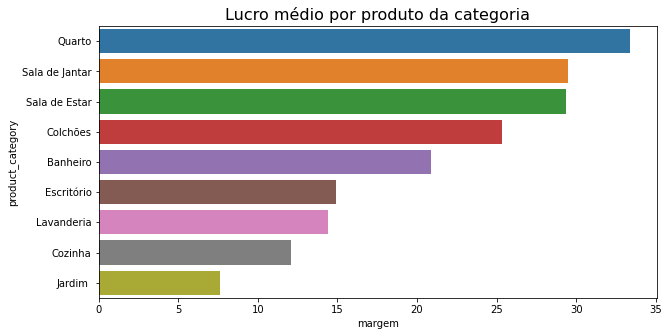

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(y='product_category',x='product_name',data=moveis.groupby('product_category').count().sort_values('product_name',ascending=False)['product_name'].reset_index())
plt.title('Quantidade total de produtos vendidos por categoria',fontsize=16);


plt.figure(figsize=(10,5))
sns.barplot(y='product_category',x='margem',data=moveis_por_categoria.sort_values('margem',ascending=False)['margem'].reset_index())
plt.title('Margem de lucro acumulada ao longo do ano por categoria',fontsize=16);




plt.figure(figsize=(10,5))
sns.barplot(y='product_category',x='margem',data=moveis.groupby('product_category').mean().reset_index()[['product_category','margem']].sort_values('margem',ascending=False))
plt.title('Lucro médio por produto da categoria',fontsize=16);


## Análises de acordo com os gráficos acima:

**Sala de estar** é a categoria que lidera em vendas e também com relação a margem de lucro total, seguida pela categoria **quarto**.


**Cozinha** é a terceira categoria que mais vende e a 4ª que mais gera lucro.


**Jardim** é a 4ª categoria que mais vende, mas com relação a margem de lucro total fica em 6º lugar.


**Sala de jantar** fica em 6º lugar com relação a vendas, mas é o 3º produto que mais gera lucro no total.


Considerando aa quantidade total de produtos vendidos por categoria e a média da margem de lucro de geral da categoria,produtos de **quarto** lideram, seguido por **sala de jantar**  e **sala de estar**.


Produtos da categoria **sala de estar** e **quarto** tem boa rotatividade e boa margem de lucro.


Produtos da categoria **sala de jantar** vendem menos do que produtos de **cozinha** e  **jardim**, mas em compensação dão mais lucro.



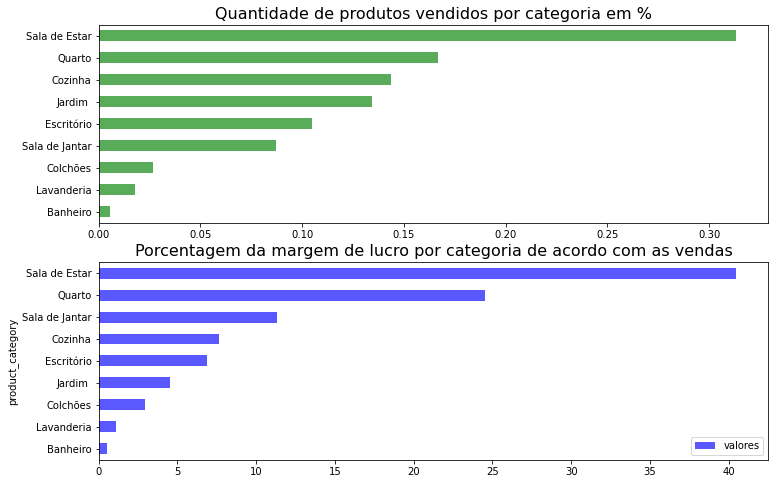

In [14]:
lista=['Sala de Estar',
 'Quarto',
 'Cozinha',
 'Jardim ',
 'Escritório',
 'Sala de Jantar',
 'Colchões',
 'Lavanderia',
 'Banheiro']
porc=[]
for i in lista:
    valor=(moveis[moveis['product_category']==i].margem.sum()/moveis.margem.sum())*100
    porc.append(valor)

valores=pd.DataFrame()
valores['product_category']=lista
valores['valores']=porc


fig,ax=plt.subplots(2,1,figsize=(12,8))
moveis.product_category.value_counts(normalize=True,ascending=True).plot(kind='barh',color='g',alpha=0.65,ax=ax[0])
ax[0].set_title('Quantidade de produtos vendidos por categoria em %',fontsize=16)

valores.set_index('product_category').sort_values('valores',ascending=True).plot(kind='barh',color='b',alpha=0.65,ax=ax[1])
ax[1].set_title('Porcentagem da margem de lucro por categoria de acordo com as vendas',fontsize=16);

In [15]:
custo_lucro=moveis.groupby('product_category').mean().drop(columns=['cliente_id','cliente_idade']).sort_values('margem',ascending=False)

custo_lucro

,receita_bruta,custo_de_frete,custo_do_produto,imposto_venda,receita_liquida,margem
product_category,,,,,,
Quarto,75.227287,12.345261,20.464338,9.027274,66.200012,33.390413
Sala de Jantar,66.714594,11.539671,17.678200,8.005751,58.708843,29.490973
Sala de Estar,79.176039,19.142650,21.201846,9.501125,69.674915,29.330419
Colchões,70.669328,17.522885,19.312336,8.480319,62.189009,25.353787
Banheiro,48.849037,8.975704,13.137704,5.861884,42.987153,20.873745
Escritório,37.624437,8.276709,9.901401,4.514932,33.109504,14.931394
Lavanderia,36.013973,7.847146,9.444680,4.321677,31.692296,14.400469
Cozinha,30.396621,6.807026,7.868656,3.647594,26.749026,12.073344
Jardim,20.756739,4.950145,5.692839,2.490809,18.265930,7.624438


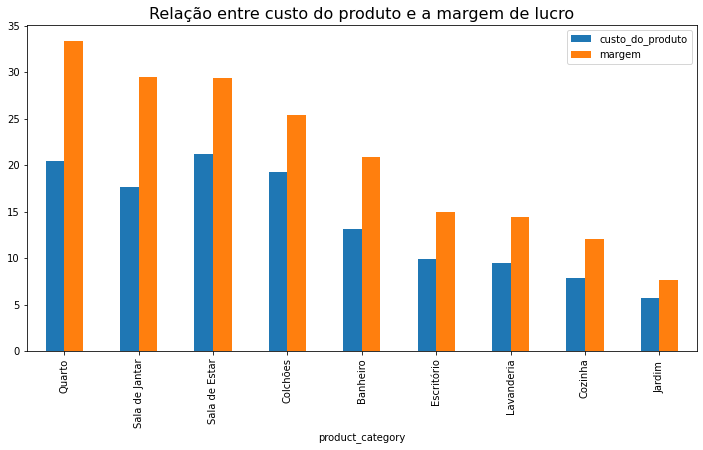

In [16]:
custo_lucro[['custo_do_produto','margem']].plot(kind='bar',figsize=(12,6))
plt.title('Relação entre custo do produto e a margem de lucro',fontsize=16);

# Conclusão:

o investimento seria destinado as categorias que tem potencial pra crescer, analisando também a relação entre o custo dos produtos e a margem de lucro dos mesmos, que estão agrupados por categoria. Logo a faria a distribuição da seguinte forma:

**Quarto: 20%** pois é um segmento que tem potencial de crescimento, podendo aumentar a venda de produtos vendidos por ano, além de ter a maior margem de lucro e menor preço de custo por produto.

**Colchões: 5%** é um segmento que está bem proximo do **quarto**, o objetivo seria atrair os clientes que compram produtos relacionados a quarto, comprarem também prdutos relacionados a colchões, categoria que tem baixa rotatividade mas uma boa margem de lucro.

As categorias acima, estiveram sempre em uma crescentem durante o ano inteiro.

**Sala de Jantar: 20%** É uma categoria com custo menor que sala de estar e a segunda maior margem  de lucro, representa menos de 10% das venda, não estando entre os produtos mais vendidos, sendo uma categoria com potencial crescimento.

**Sala de Estar: 20%** è a categoria com 3ª maior margem de lucro,mas apesar do custo do produto ser o mais alto e ter produtos com preços mais elevados, é disparada a categoria que mais vende, representando um pouco mais de 30% das vendas totais da loja, e mais de 40% do faturamento total, valendo a pena investir em marketing para continuar vendendo bastante nessa categoria.


**Cozinha e Escritório**:**10%** em cada categoria, visto que tem resultados bem parecidos, como custo do produto e margem de lucro. 

**Banheiro, Jardim e Lavanderia** **%5** em cada catgoria,são categorias que tem menor margem de lucro e menor representatividade na receita da empresa.